In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

df_2006 = pd.read_csv("df_scaled_2006.csv").drop(columns=["AREA"])
df_2006.columns = ['AVG_INCOME','AVG_VALUE_DWELLINGS','POSTSECONDARY_PCT','MANAGEMENT_PCT']
df_2006

,AVG_INCOME,AVG_VALUE_DWELLINGS,POSTSECONDARY_PCT,MANAGEMENT_PCT
0,0.207156,0.002891,0.066391,0.512184
1,0.029128,-0.409349,0.230279,0.678383
2,0.580978,0.102192,0.327180,0.529592
3,0.102893,-0.570003,0.614496,0.268921
4,-0.548640,-0.586505,-0.473480,-0.582189
5,-0.541597,-0.427578,-0.968851,-0.654064
6,-0.581810,-0.439716,-0.908865,-0.710664
7,0.833326,0.259423,0.178526,0.615609
8,-0.462003,-0.482507,-0.465525,-0.433232
9,0.101262,-0.312796,0.580560,0.196601


In [36]:
df_labels=pd.read_csv("score_analysis.csv",usecols=["STATUS"])
df_labels

,STATUS
0,stb
1,stb
2,asc
3,stb
4,asc
5,stb
6,stb
7,dec
8,stb
9,stb


In [37]:
# split the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(df_2006, df_labels, test_size=0.3, stratify = df_labels, random_state=50)

# Random Forest model

In [38]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier()

In [39]:
y_pred = rf.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2857142857142857


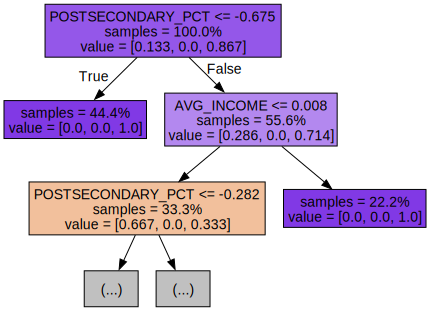

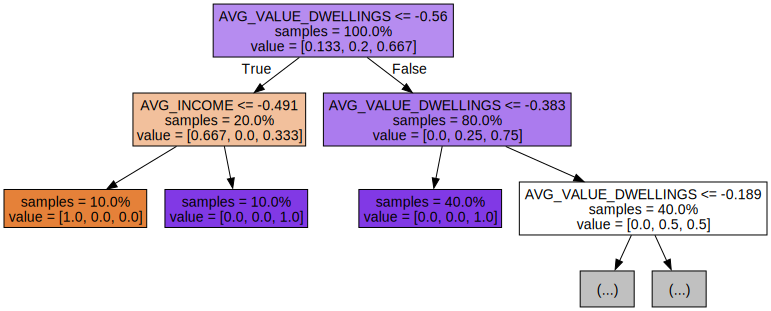

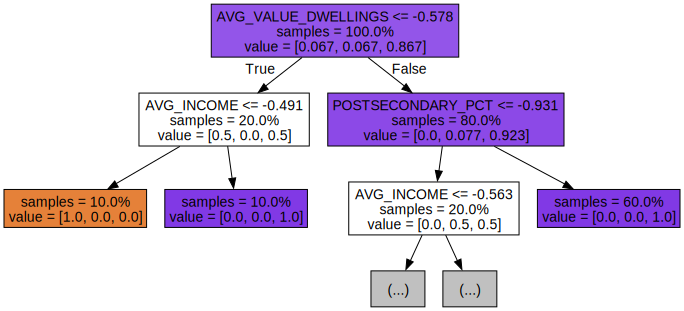

In [41]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [42]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=2)

# Fit the random search object to the data
rand_search.fit(x_train, y_train.values.ravel())

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1769c9840>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1769ca020>})

In [43]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 479}


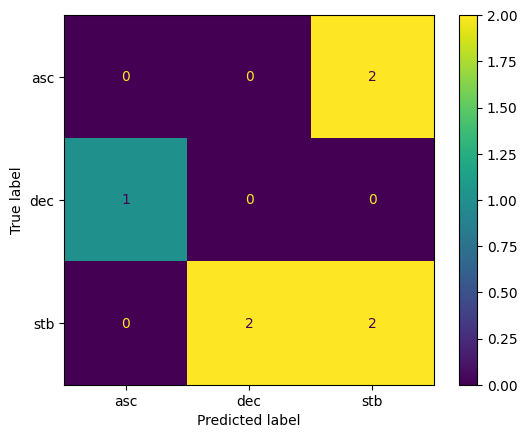

In [44]:
# Generate predictions with the best model
y_pred_rand_search = best_rf.predict(x_test)

# Create the confusion matrix
labels = best_rf.classes_
cm = confusion_matrix(y_test, y_pred_rand_search, labels=labels)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot();

In [45]:
accuracy = accuracy_score(y_test, y_pred_rand_search)
print("Accuracy:", accuracy)

Accuracy: 0.2857142857142857


In [46]:
df_2016 = pd.read_csv("df_scaled_2016.csv").drop(columns=["AREA"])
df_2016.columns = ['AVG_INCOME','AVG_VALUE_DWELLINGS','POSTSECONDARY_PCT','MANAGEMENT_PCT']
df_2016

,AVG_INCOME,AVG_VALUE_DWELLINGS,POSTSECONDARY_PCT,MANAGEMENT_PCT
0,0.207156,0.002891,0.066391,0.512184
1,0.029128,-0.409349,0.230279,0.678383
2,0.580978,0.102192,0.327180,0.529592
3,0.102893,-0.570003,0.614496,0.268921
4,-0.548640,-0.586505,-0.473480,-0.582189
5,-0.541597,-0.427578,-0.968851,-0.654064
6,-0.581810,-0.439716,-0.908865,-0.710664
7,0.833326,0.259423,0.178526,0.615609
8,-0.462003,-0.482507,-0.465525,-0.433232
9,0.101262,-0.312796,0.580560,0.196601


In [47]:
y_pred_2026 = best_rf.predict(df_2016)
y_pred_2026

array(['stb', 'stb', 'stb', 'stb', 'asc', 'stb', 'stb', 'dec', 'stb',
       'stb', 'stb', 'stb', 'stb', 'stb', 'asc', 'dec', 'asc', 'stb',
       'stb', 'dec', 'asc', 'dec'], dtype=object)